# Introduction
## A picture of Lego characters!

#### Let's look at Lego sets!
#### Lego is a household name across the world, supported by a diverse toy line, hit movies, and a series of successful video games. In this project, we are going to explore a key development in the history of Lego: the introduction of licensed sets such as Star Wars, Super Heroes, and Harry Potter.

#### It may not be widely known, but Lego has had its share of ups and downs since its inception in the early 20th century. This includes a particularly rough period in the late 90s. As described in this article, Lego was only able to survive due to a successful internal brand (Bionicle) and the introduction of its first licensed series: Star Wars. In the instructions panel are the two questions you will need to answer to complete this project.

#### Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:

### datasets/lego_sets.csv
#### set_num: A code that is unique to each set in the dataset. This column is critical, and a missing value indicates the set is a duplicate or invalid!
#### set_name: A name for every set in the dataset (note that this can be the same for different sets).
#### year: The date the set was released.
#### num_parts: The number of parts contained in the set. This column is not central to our analyses, so missing values are acceptable.
#### theme_name: The name of the sub-theme of the set.
#### parent_theme: The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.
### datasets/parent_themes.csv
#### id: A code that is unique to every theme.
#### name: The name of the parent theme.
#### is_licensed: A Boolean column specifying whether the theme is a licensed theme.

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df=pd.read_csv(r'C:\Users\RAHUL\Desktop\csvfolder\lego csv folder\lego_sets.csv')

theme=pd.read_csv(r'C:\Users\RAHUL\Desktop\csvfolder\lego csv folder\parent_themes.csv')

#### Qn 1. What percentage of all licensed sets ever released were star wars themed 
####      and What percentage of all non_licensed sets ever released were Space themed?
#### Let the variable be 'the_force' in the form of an integer for star wars and
####    'Space_nonlicensed_percent' in the form of an integer for space.


In [4]:
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

set_num-1%
name-1%
year-0%
num_parts-42%
theme_name-1%
parent_theme-0%


In [5]:
for col in theme.columns:
    pct_missing=np.mean(theme[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

id-0%
name-0%
is_licensed-0%


In [6]:
df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [7]:
 theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


In [8]:
df_new=pd.merge(left=df,right=theme,how='left',left_on='parent_theme',right_on='name')
df_new.drop(columns='name_y',inplace=True)
df_new

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,True


In [9]:
for col in df_new.columns:
    pct_missing=np.mean(df_new[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

set_num-1%
name_x-1%
year-0%
num_parts-42%
theme_name-1%
parent_theme-0%
id-0%
is_licensed-0%


In [10]:

df_new[df_new['set_num'].isnull()]

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
11833,NaN,NaN,2017,347.0,NaN,Disney Princess,579,True
11834,NaN,NaN,2016,70.0,NaN,Disney Princess,579,True
11835,NaN,NaN,2016,NaN,NaN,Disney Princess,579,True
11836,NaN,NaN,2017,304.0,NaN,Super Heroes,482,True
11837,NaN,NaN,2017,196.0,NaN,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11981,NaN,NaN,2014,NaN,NaN,Minecraft,577,True
11982,NaN,NaN,2006,NaN,NaN,Super Heroes,482,True
11983,NaN,NaN,2017,NaN,NaN,Minecraft,577,True
11984,NaN,NaN,2017,8.0,NaN,Super Heroes,482,True


In [11]:
df_new
df_new.dropna(subset=['set_num'],inplace=True)
df_new

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


In [12]:
for col in df_new.columns:
    pct_missing=np.mean(df_new[col].isnull())
    print('{}-{}%'.format(col,round(pct_missing*100)))

set_num-0%
name_x-0%
year-0%
num_parts-42%
theme_name-0%
parent_theme-0%
id-0%
is_licensed-0%


In [13]:
nonlicense_true=df_new[df_new['is_licensed']!=True] 
nonlicense_true

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


In [14]:
###now to see , which percentage of themes are star wars
space_nonlicensed=nonlicense_true[nonlicense_true['parent_theme']=='Space']
space_nonlicensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
5,0014-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
6,0015-1,Space Mini-Figures,1979,NaN,Supplemental,Space,126,False
635,11910-1,Micro-Scale Space Cruiser,2015,102.0,Space,Space,126,False


In [15]:
space_nonlicensed.shape[0]

332

In [16]:
nonlicense_true.shape[0]

10654

In [17]:
Space_nonlicensed_percent=int((space_nonlicensed.shape[0]/nonlicense_true.shape[0])*100)
Space_nonlicensed_percent


3

In [18]:
license_true=df_new[df_new['is_licensed']] #since 'is_licensed' column is a boolean we don't need to add == True
license_true


,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [19]:
###now to see , which percentage of themes are star wars
star_wars=license_true[license_true['parent_theme']=='Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
116,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [20]:
star_wars.shape  #(rows,columns)

(609, 8)

In [21]:
star_wars.shape[0]  #to check the licensed lego having only starwars

609

In [22]:
license_true.shape  #to check the licensed lego having only True

(1179, 8)

In [23]:
license_true.shape[0]

1179

In [24]:
the_force=int(star_wars.shape[0]/license_true.shape[0]*100)
the_force

51

In [25]:
print('the total rows  here are '+ str(len(star_wars)))

the total rows  here are 609


#### 2. In which year was Star Wars not the most popular licensed theme (in terms of number of sets 
#### released that year)?. Save your answer as a variable new_era in the form of an integer (eg 2012)

#### We may require to remove values from critical columns

In [26]:
df_new.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False


In [27]:
license_true

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
44,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
45,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
54,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
57,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
95,10075-1,Spider-Man Action Pack,2002,25.0,Spider-Man,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
11811,VP-12,Star Wars Co-Pack of 7121 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11816,VP-2,Star Wars Co-Pack of 7110 and 7144,2001,2.0,Star Wars Episode 4/5/6,Star Wars,158,True
11817,VP-3,Star Wars Co-Pack of 7131 and 7151,2000,2.0,Star Wars Episode 1,Star Wars,158,True
11818,VP-4,Star Wars Co-Pack of 7101 7111 and 7171,2000,3.0,Star Wars Episode 1,Star Wars,158,True


In [28]:
license_sort=license_true.sort_values('year')
license_sort['count']=1
license_sort

summed_df=license_sort.groupby(['year','parent_theme']).sum().reset_index() 
##resetindex is good to do when you group by a aggregate ##dataframe
###if we just grouped it by the year, that would merge together all the parent themes , we don't want that.
### we want year and parent themes separately
#### to get the no of total star warsin 1999 say, what we can do is , take groupby and call the sum aggregate method
summed_df.head(50)

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
1,2000,Disney's Mickey Mouse,405.0,1940,5,5
2,2000,Star Wars,2580.0,4108,26,26
3,2001,Harry Potter,1284.0,2706,11,11
4,2001,Star Wars,2949.0,2212,14,14
5,2002,Harry Potter,1397.0,4674,19,19
6,2002,Star Wars,4735.0,4424,28,28
7,2002,Super Heroes,333.0,1446,3,3
8,2003,Harry Potter,0.0,738,3,3
9,2003,Star Wars,6660.0,5056,32,32


##### to check in which year was star wars not the most popular licensed theme, compare
##### star wars with other parent_theme or just check the max count for each year


In [29]:
#Get the max row of anything that shares the same year i.e get only max rows for the count column in groupby pandas df
max_df=summed_df.sort_values('count',ascending=False).drop_duplicates(['year'])
#if we have multiple licensed id's in the same year eg:2000 and if we sorted them all and then
#drop the ones that come later , the drop_duplicates by default will take the first instance 
#and drop any next occurance

In [30]:
max_df.sort_values('year',inplace=True)
max_df

,year,parent_theme,num_parts,id,is_licensed,count
0,1999,Star Wars,1384.0,2054,13,13
2,2000,Star Wars,2580.0,4108,26,26
4,2001,Star Wars,2949.0,2212,14,14
6,2002,Star Wars,4735.0,4424,28,28
9,2003,Star Wars,6660.0,5056,32,32
12,2004,Star Wars,1659.0,3160,20,20
16,2005,Star Wars,4730.0,4424,28,28
20,2006,Star Wars,2769.0,1738,11,11
24,2007,Star Wars,11361.0,2528,16,16
28,2008,Star Wars,6865.0,3634,23,23


#### Ans to 2nd qn is given below

In [44]:
new_era= 2017
new_era

2017

In [42]:
min_df=summed_df.sort_values('count',ascending=False).drop_duplicates(['year'],keep='last').reset_index()
min_df.sort_values('year',inplace=True)
min_df

,index,year,parent_theme,num_parts,id,is_licensed,count
0,0,1999,Star Wars,1384.0,2054,13,13
5,1,2000,Disney's Mickey Mouse,405.0,1940,5,5
1,3,2001,Harry Potter,1284.0,2706,11,11
8,7,2002,Super Heroes,333.0,1446,3,3
7,8,2003,Harry Potter,0.0,738,3,3
4,13,2004,Super Heroes,864.0,2892,6,6
13,17,2005,Super Heroes,3.0,482,1,1
10,18,2006,Avatar,0.0,634,2,2
16,22,2007,Harry Potter,0.0,246,1,1
6,27,2008,SpongeBob SquarePants,209.0,816,3,3


#### Qn 3.  Breakdown number of sets by year

In [45]:
clean_df=df_new[~df_new['set_num'].isnull()]
clean_df

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False
...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False


In [46]:
clean_df['count']=1
clean_df

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed,count
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False,1
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town,50,False,1
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle,186,False,1
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space,126,False,1
...,...,...,...,...,...,...,...,...,...
11828,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,15.0,LEGO Brand Store,LEGO Brand Store,408,False,1
11829,WHITEHOUSE-1,Micro White House,2015,NaN,Promotional,Promotional,598,False,1
11830,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,146.0,LEGO Brand Store,LEGO Brand Store,408,False,1
11831,WishingWell-1,Wishing Well [Toys R Us Promo],2013,NaN,Friends,Friends,494,False,1


In [35]:
setsandyear=clean_df.groupby(['year']).sum().reset_index()[['year','count']]
setsandyear

for index,row in setsandyear.iterrows():
    print(row['year'] ,row['count'])

1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 68
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


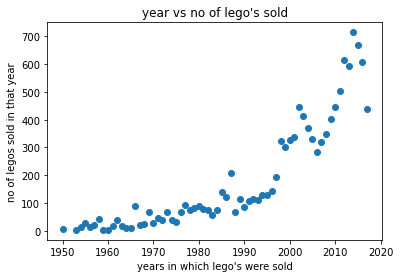

In [36]:
import matplotlib.pyplot as plt
###do a scatter plot on the year vs the no of lego's sold
plt.scatter(x=setsandyear['year'],y=setsandyear['count'])
plt.xlabel("years in which lego's were sold")
##plt.xticks('budget')
plt.ylabel("no of legos sold in that year")
##plt.yticks('gross')
plt.title("year vs no of lego's sold")
plt.show()

([<matplotlib.axis.XTick at 0x19bca25d9a0>,
 [Text(0, 0, '1950'),
  Text(1, 0, '1953'),
  Text(2, 0, '1954'),
  Text(3, 0, '1955'),
  Text(4, 0, '1956'),
  Text(5, 0, '1957'),
  Text(6, 0, '1958'),
  Text(7, 0, '1959'),
  Text(8, 0, '1960'),
  Text(9, 0, '1961'),
  Text(10, 0, '1962'),
  Text(11, 0, '1963'),
  Text(12, 0, '1964'),
  Text(13, 0, '1965'),
  Text(14, 0, '1966'),
  Text(15, 0, '1967'),
  Text(16, 0, '1968'),
  Text(17, 0, '1969'),
  Text(18, 0, '1970'),
  Text(19, 0, '1971'),
  Text(20, 0, '1972'),
  Text(21, 0, '1973'),
  Text(22, 0, '1974'),
  Text(23, 0, '1975'),
  Text(24, 0, '1976'),
  Text(25, 0, '1977'),
  Text(26, 0, '1978'),
  Text(27, 0, '1979'),
  Text(28, 0, '1980'),
  Text(29, 0, '1981'),
  Text(30, 0, '1982'),
  Text(31, 0, '1983'),
  Text(32, 0, '1984'),
  Text(33, 0, '1985'),
  Text(34, 0, '1986'),
  Text(35, 0, '1987'),
  Text(36, 0, '1988'),
  Text(37, 0, '1989'),
  Text(38, 0, '1990'),
  Text(39, 0, '1991'),
  Text(40, 0, '1992'),
  Text(41, 0, '1993'),


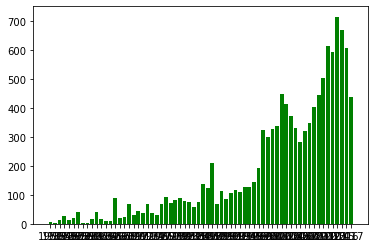

In [37]:
y=np.arange(len(setsandyear['year']))
plt.bar(y,setsandyear['count'],color='g')
plt.xticks(y,setsandyear['year'])

In [47]:
import plotly.express as px
fig=px.histogram(clean_df,x="year",color='count')
fig.show()
